<a href="https://colab.research.google.com/github/tnedutsefat/Assessment_4_Amazon_Reviews/blob/main/Assessment_4_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tarfile
import urllib.request
from pathlib import Path

#Download the dataset
url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Magazine_Subscriptions.jsonl.gz"
filename = "Magazine_Subscriptions.jsonl.gz"
urllib.request.urlretrieve(url, filename)

('Magazine_Subscriptions.jsonl.gz',
 <http.client.HTTPMessage at 0x7db307d278b0>)

In [2]:
import pandas as pd
# Load the dataset using pandas
df = pd.read_json(filename, lines=True, compression='gzip')

In [3]:
# Select the desired columns after loading
df = df[['rating', 'title', 'text']]

In [4]:
# Print some info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71497 entries, 0 to 71496
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  71497 non-null  int64 
 1   title   71497 non-null  object
 2   text    71497 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [5]:
def rating_score(rating):
  if rating >= 3:
    return 1
  else:
    return 0

In [6]:
# Apply the rating_score function to the 'rating' column and create a new 'score' column
df['label'] = df['rating'].apply(rating_score)

In [7]:
# Combine 'title' and 'text' columns into a new 'review_text' column
df['review_text'] = df['title'] + ' ' + df['text']

In [8]:
# Drop unnecessary columns and rename 'score' to 'label'
df = df[['label', 'review_text']]  # Select only 'score' and 'review_text'
df = df.rename(columns={'review_text': 'text'})  # Rename 'review_text' to 'text'

In [9]:
df.head()

label                                               text
0      1  Great pictures and recipes Wonderful recipes i...
1      1  great for kids who love sports! Great sports m...
2      1  A great look at what's new on the kosher scene...
3      1  If you enjoy reading an eye-catching, easy-to-...
4      0              Too many “ gear ads” !! Too many ads!

In [10]:
print(len(df))

71497


In [11]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)  # 80% train, 20% test

In [12]:
print(len(train_df))
print(len(test_df))

35748
35749


In [13]:
#Extracts text and label data from a DataFrame.
def extract_text_and_labels(df):
  texts = df['text'].tolist()
  labels = df['label'].tolist()
  return texts, labels

In [14]:
train_texts, train_labels = extract_text_and_labels(train_df)
test_texts, test_labels = extract_text_and_labels(test_df)

In [15]:
print("Train texts:", train_texts)
print("Train labels:", train_labels)

Train texts: ['irregular delivery I have not been getting this magazine regularly on a monthly basis. It seems to skip every other month or so.', 'Good for you My wife likes this magazine.', 'A delicious guilty pleasure that delivers exactly what it promises People is a glossy, relatively thick magazine dedicated both to celebrity gossip and fashion as well as human interest and true crime stories.  When compared to other gossip rags like In Touch, US Weekly, and Life & Style, People always comes out on top with its fair and balanced coverage of celeb stories.  While the other magazines exaggerate to make splashy headlines, People sticks to the facts and avoids sensationalism.<br /><br />People has excellent and extensive movie, book, and music reviews.  The price is worth it for the amount of media each weekly issue reviews.<br /><br />People is a little pricier than the other gossip magazines, but it packs a punch of information that goes beyond just celeb lifestyles and fashions.', 

In [16]:
#sklearn to create a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)

In [17]:
print("Train texts:", len(train_texts))
print("Train labels:", len(train_labels))
print("Test texts:", len(test_texts))
print("Test labels:", len(test_labels))
print("Val texts:", len(val_texts))
print("Val labels:", len(val_labels))

Train texts: 28598
Train labels: 28598
Test texts: 35749
Test labels: 35749
Val texts: 7150
Val labels: 7150


In [18]:
#DistilBert tokenizer
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
#pass text to the tokenizer
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [20]:
# to understand how the encoded output looks like
print(train_encodings.keys()) # print all keys
print(train_encodings['input_ids'][0])  # Print the 'input_ids' of the first entry
print(train_encodings['attention_mask'][0])  # Print the 'attention_mask' of the first entry

dict_keys(['input_ids', 'attention_mask'])
[101, 2293, 2111, 2932, 2111, 2003, 1996, 2190, 2932, 2008, 1045, 2031, 2412, 3191, 1012, 1045, 4942, 29234, 2000, 2009, 1998, 2009, 3310, 2006, 2051, 2296, 2733, 1010, 2196, 5591, 1010, 2066, 2060, 7298, 1012, 1045, 2066, 1996, 3441, 1010, 4620, 1998, 1996, 2892, 18351, 19672, 1012, 1045, 2036, 2066, 1996, 2755, 2008, 2009, 1005, 1055, 2025, 2035, 2055, 5365, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [21]:
#converting labels and encoding into Dataset object
import torch

class AmznCustReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = AmznCustReviewDataset(train_encodings, train_labels)
val_dataset = AmznCustReviewDataset(val_encodings, val_labels)
test_dataset = AmznCustReviewDataset(test_encodings, test_labels)

In [22]:
print(len(train_dataset))

28598


In [23]:
#fine tune with trainer
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=5364, training_loss=0.12956644754751262, metrics={'train_runtime': 3973.7238, 'train_samples_per_second': 21.59, 'train_steps_per_second': 1.35, 'total_flos': 1.1364908000292864e+16, 'train_loss': 0.12956644754751262, 'epoch': 3.0})

In [24]:
import numpy as np

# Evaluate the model
eval_results = trainer.evaluate()

# Print the evaluation results
print(eval_results)

# Get predictions on the validation set
predictions = trainer.predict(val_dataset)

# Extract predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

{'eval_loss': 0.26705658435821533, 'eval_runtime': 111.8951, 'eval_samples_per_second': 63.899, 'eval_steps_per_second': 1.001, 'epoch': 3.0}


In [25]:
# Get true labels from the validation dataset
true_labels = val_dataset.labels  # Assuming 'labels' is the attribute containing true labels

# Import accuracy_score
from sklearn.metrics import accuracy_score # Import the accuracy_score function from sklearn.metrics

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Print accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.9355244755244755


In [26]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score # Import precision_score, recall_score, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Precision: 0.9571133310368585
Recall: 0.9632518634078696
F1-score: 0.9601727861771059
Confusion Matrix:
[[1132  249]
 [ 212 5557]]


In [27]:
# Get predictions on the test set
test_predictions = trainer.predict(test_dataset)

# Extract predicted labels
predicted_test_labels = np.argmax(test_predictions.predictions, axis=1)

# Get true labels from the test dataset
true_test_labels = test_dataset.labels  # Assuming 'labels' is the attribute containing true labels

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for test predictions
test_accuracy = accuracy_score(true_test_labels, predicted_test_labels)
test_precision = precision_score(true_test_labels, predicted_test_labels)
test_recall = recall_score(true_test_labels, predicted_test_labels)
test_f1 = f1_score(true_test_labels, predicted_test_labels)

# Print the results
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

Test Accuracy: 0.9365296931382696
Test Precision: 0.9584078711985689
Test Recall: 0.963345897161036
Test F1-score: 0.9608705399486092


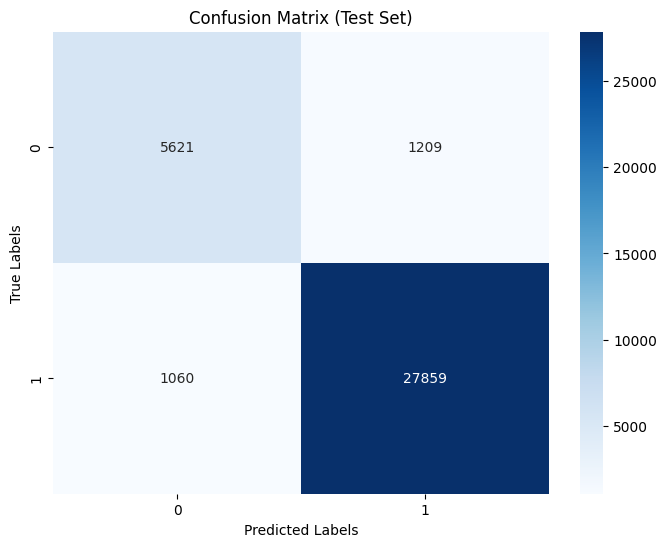

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(true_test_labels, predicted_test_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [35]:
from transformers import pipeline, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the configuration, tokenizer, and model
config = AutoConfig.from_pretrained("./results/checkpoint-5364")
model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-5364")

# Create the pipeline
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, config=config)

# Define your sample sentences
sample_sentences = [
    "This magazine is great!",
    "I am not satisfied with this service."
]

# Make predictions
for sentence in sample_sentences:
    result = classifier(sentence)
    print(f"Sentence: {sentence}")
    print(f"Prediction: {result[0]['label']}, Score: {result[0]['score']}\n")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentence: This magazine is great!
Prediction: LABEL_1, Score: 0.9998466968536377

Sentence: I am not satisfied with this service.
Prediction: LABEL_0, Score: 0.9907203912734985



In [36]:
!pip install huggingface_hub

In [44]:
from huggingface_hub import notebook_login
notebook_login()

In [45]:
from huggingface_hub import HfApi

api = HfApi() #Removed extra space to correct the indent
# Replace 'your-username/your-model-name' with your desired repository name
api.upload_folder(
    folder_path="./results/checkpoint-5364",
    repo_id="TafeStu/distilbert-finetuned-amzn-customer-review",
    repo_type="model",
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/536M [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/TafeStu/distilbert-finetuned-amzn-customer-review/commit/d5adf85735521ebc812ede0d344b5df1191e8c99', commit_message='Upload folder using huggingface_hub', commit_description='', oid='d5adf85735521ebc812ede0d344b5df1191e8c99', pr_url=None, pr_revision=None, pr_num=None)

In [30]:
# from transformers import pipeline, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
# import torch

# checkpoint = "./results/checkpoint-5364"
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# # Create the pipeline
# classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# # Define your sample sentences
# sample_sentences = [
#     "This magazine is great!",
#     "I am not satisfied with this service."
# ]

# # Make predictions
# for sentence in sample_sentences:
#     result = classifier(sentence)
#     print(f"Sentence: {sentence}")
#     print(f"Prediction: {result[0]['label']}, Score: {result[0]['score']}\n")